In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('mushroom.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# PreProcessing

In [3]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Label Encoder

In [4]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])
data    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


# Statistical Summary

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [6]:
data=data.drop(['veil-type'],axis=1)

In [7]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


The violin plot below represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification.

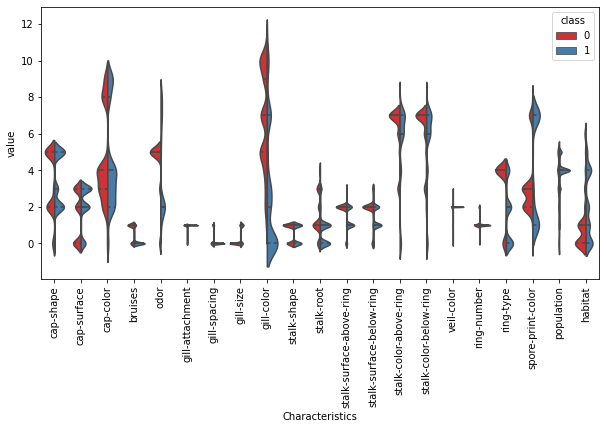

In [8]:
data_div = pd.melt(data, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=data_div, inner = 'quartile', palette = 'Set1')
data_no_class = data.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(data_no_class.columns));

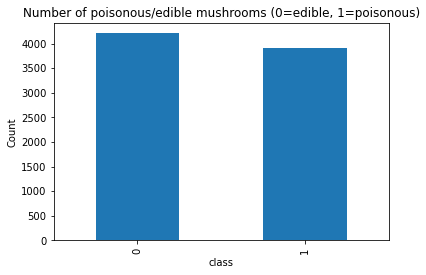

In [9]:
plt.figure()
pd.Series(data['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

The dataset is balanced 

# correlation

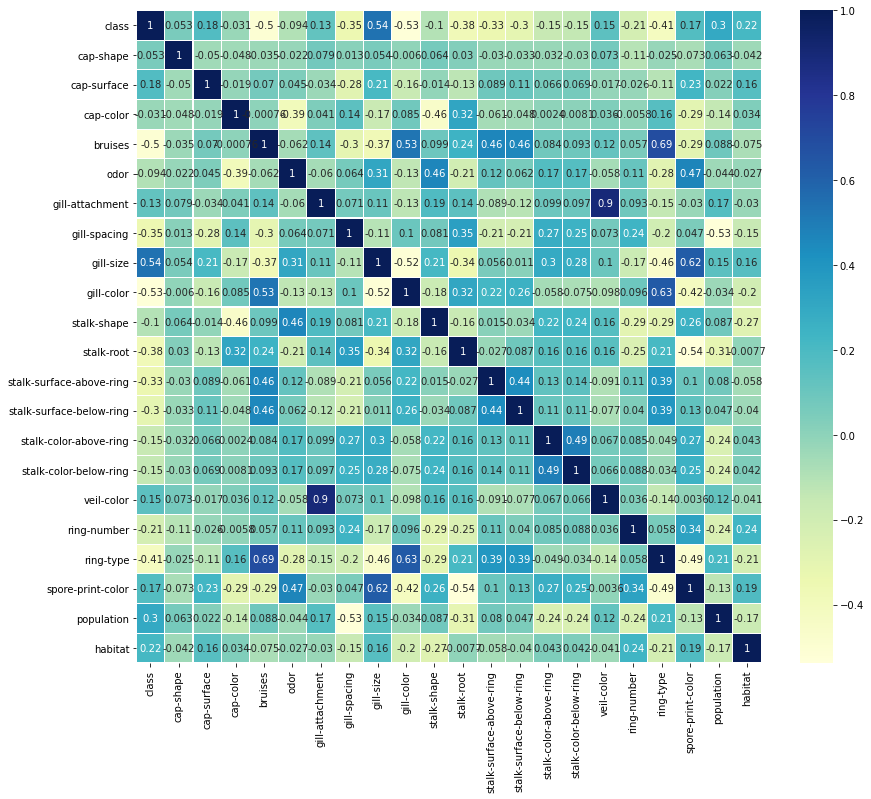

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

The least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53.

In [11]:
data[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


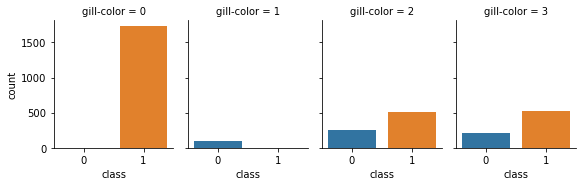

In [12]:
new_var=data[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

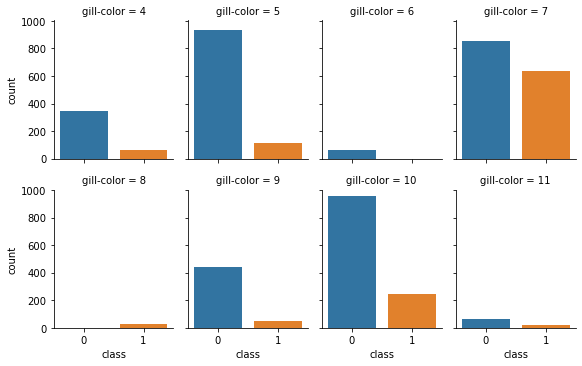

In [13]:
new_var=data[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

# Model, predict and estimate the result:

In [14]:
X=data.drop(['class'], axis=1)
Y=data['class']

In [15]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [16]:
Y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [17]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)

# Decision tree classifier

In [18]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

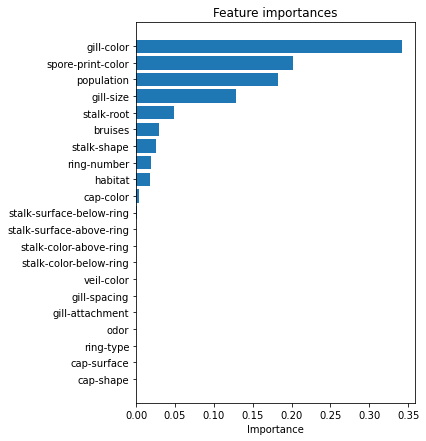

In [19]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [20]:
y_pred=clf.predict(X_test)

In [21]:
print("Decision Tree Classifier report \n", classification_report(Y_test, y_pred))

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       432
           1       1.00      1.00      1.00       381

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



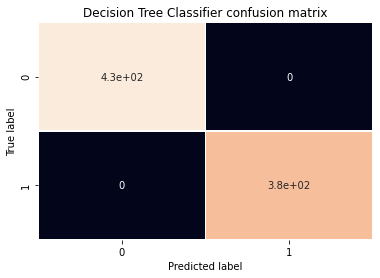

In [22]:
cfm=confusion_matrix(Y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

# Decision Tree Classifier resulted 100% accuracy and precision!! 

In the code below 10-fold cross validation is performed for different depths of the tree and the accuracy is computed. The accuracy on the test set seems to plateau when the depth is 10.

Lets see at which tree depth the model begins to overfit:



In [23]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
knn.score(X_train,Y_train)
predknn=knn.predict(X_test)
print(accuracy_score(Y_test,predknn))
print(confusion_matrix(Y_test,predknn))
print(classification_report(Y_test,predknn))

0.997539975399754
[[431   1]
 [  1 380]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       432
           1       1.00      1.00      1.00       381

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [24]:
svc=SVC(kernel='poly')
svc.fit(X_train,Y_train)
svc.score(X_train,Y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

1.0
[[432   0]
 [  0 381]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       432
           1       1.00      1.00      1.00       381

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [25]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(X_train,Y_train)
    svc.score(X_train,Y_train)
    predsvc=svc.predict(X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

1.0
[[432   0]
 [  0 381]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       432
           1       1.00      1.00      1.00       381

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [26]:
svmkernel('rbf')


In [27]:
svmkernel('poly')

In [28]:
data1=pd.DataFrame(predsvc)
data1.to_csv('svc2_prediction.csv')

In [29]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]
predm=DecisionTreeClassifier()
for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predem=m.predict(X_test)
    print('Accuracy score of',m,'is')
    print(accuracy_score(Y_test,predem))
    print(confusion_matrix(Y_test,predem))
    print(classification_report(Y_test,predem))
    print('\n')

Accuracy score of DecisionTreeClassifier() is
1.0
[[432   0]
 [  0 381]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       432
           1       1.00      1.00      1.00       381

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



Accuracy score of SVC() is
0.988929889298893
[[432   0]
 [  9 372]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       432
           1       1.00      0.98      0.99       381

    accuracy                           0.99       813
   macro avg       0.99      0.99      0.99       813
weighted avg       0.99      0.99      0.99       813



Accuracy score of KNeighborsClassifier() is
0.997539975399754
[[431   1]
 [  1 380]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       432
       

# Saving the best model